# Heatmaps of CSF Flow for All Patients

In TimeSTAMP MRI images, cerebrospinal fluid can be seen as white whisps of fluid flowing up and down the spinal canal (more specifically the spinal subarachnoid space, or "SSAS"). Since the hand measurements of flow captured the upper and lower bounds of the tagged fluid, we can overlay each of these "packets" of fluid of CSF on top of each other to visualize flow in a heatmap-like fashion.

**Several types of heatmaps are below.** Some have duplicate versions, where only "medium" and "high" quality data is included.
* Graphs of each flow measurement separated by patient, intervertebral region, and side of the spine (anterior vs. posterior)
* Heatmap that overlays all 8 images from each participant at each region
* Heatmap that separates anterior and posterior flows

**Data preparation**
* Removed intervertebral regions that are not `C2-3`, `C5-6`, `T1-2`, `T3-4`, or `T6-7` (some `C7-T1` regions and others were erroneously captured)
* Delineated high- and medium-quality vs. low- or unreadable-quality images

**Authors:**
* Andrew Roman, andrew.roman@commonspirit.org, aeroman2@asu.edu
* Jakob Perivolotis, jperivol@asu.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300 # Set image resolution

In [2]:
csf_flow_df = pd.read_csv('../../data/CSF_Flow_TimeSTAMP_measurements.csv')
csf_flow_df.head()

,patient_id,age,spinal_region,image_group,image_number,foramen_magnum_distance,super_ante_displacement,infer_ante_displacement,super_post_displacement,infer_post_displacement,super_ante_width,infer_ante_width,super_post_width,infer_post_width,ante_qual_direction,post_qual_direction,image_quality
0,2,24,C2-3,1,1,NaN,-3.29,-5.02,2.26,-1.067,3.29,4.339,3.65,2.503,caudal,rostral,high
1,2,24,C2-3,1,2,NaN,3.676,1.808,1.804,0,5.348,4.391,3.04,2.45,rostral,rostral,high
2,2,24,C2-3,1,3,NaN,-4.33,-9.174,0.8,-4.159,4.099,4.015,2.879,2.042,caudal,caudal,high
3,2,24,C2-3,1,4,NaN,1.194,0,1.717,0,4.207,4.192,3.1,3.385,rostral,rostral,high
4,2,24,C2-3,1,5,NaN,2.585,2.58,1.173,0,4.541,4.4,3.058,2.364,rostral,rostral,high


### Set ID, quality-related, and other columns to Pandas' Categorical type

In [3]:
csf_flow_df['patient_id'] = pd.Categorical(csf_flow_df['patient_id'])
csf_flow_df['image_number'] = pd.Categorical(csf_flow_df['image_number'])
csf_flow_df['ante_qual_direction'] = pd.Categorical(csf_flow_df['ante_qual_direction'])
csf_flow_df['post_qual_direction'] = pd.Categorical(csf_flow_df['post_qual_direction'])

quality_order = ['unreadable', 'low', 'medium', 'high']
csf_flow_df['image_quality'] = pd.Categorical(csf_flow_df['image_quality'],
                                                categories=quality_order,
                                                ordered=True
                                               )

spinal_region_order = ['C2-3', 'C5-6', 'C7-T1', 'T1', 'T1-2', 'T3-4', 'T6-7']
csf_flow_df['spinal_region'] = pd.Categorical(csf_flow_df['spinal_region'],
                                                categories=spinal_region_order,
                                                ordered=True
                                               )
csf_flow_df.dtypes

patient_id                 category
age                           int64
spinal_region              category
image_group                   int64
image_number               category
foramen_magnum_distance     float64
super_ante_displacement      object
infer_ante_displacement      object
super_post_displacement      object
infer_post_displacement      object
super_ante_width             object
infer_ante_width             object
super_post_width             object
infer_post_width             object
ante_qual_direction        category
post_qual_direction        category
image_quality              category
dtype: object

### Set measurement columns to floats

In [4]:
numeric_columns = ['super_ante_displacement', 'infer_ante_displacement', 'super_post_displacement', 'infer_post_displacement',
                   'super_ante_width', 'infer_ante_width', 'super_post_width', 'infer_post_width']
csf_flow_df[numeric_columns] = csf_flow_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
csf_flow_df.dtypes

patient_id                 category
age                           int64
spinal_region              category
image_group                   int64
image_number               category
foramen_magnum_distance     float64
super_ante_displacement     float64
infer_ante_displacement     float64
super_post_displacement     float64
infer_post_displacement     float64
super_ante_width            float64
infer_ante_width            float64
super_post_width            float64
infer_post_width            float64
ante_qual_direction        category
post_qual_direction        category
image_quality              category
dtype: object

## Create a separate dataframe with only medium- and high-quality images

Since MRI images vary in quality, separate analyses were performed on image sets that contained only "medium" or "high" quality images to see if this changed the results.

In [5]:
csf_flow_high_med = csf_flow_df[csf_flow_df['image_quality'].isin(['medium', 'high'])]
csf_flow_high_med = csf_flow_high_med.reset_index(drop=True)
csf_flow_high_med

,patient_id,age,spinal_region,image_group,image_number,foramen_magnum_distance,super_ante_displacement,infer_ante_displacement,super_post_displacement,infer_post_displacement,super_ante_width,infer_ante_width,super_post_width,infer_post_width,ante_qual_direction,post_qual_direction,image_quality
0,2,24,C2-3,1,1,NaN,-3.290,-5.020,2.260,-1.067,3.290,4.339,3.650,2.503,caudal,rostral,high
1,2,24,C2-3,1,2,NaN,3.676,1.808,1.804,0.000,5.348,4.391,3.040,2.450,rostral,rostral,high
2,2,24,C2-3,1,3,NaN,-4.330,-9.174,0.800,-4.159,4.099,4.015,2.879,2.042,caudal,caudal,high
3,2,24,C2-3,1,4,NaN,1.194,0.000,1.717,0.000,4.207,4.192,3.100,3.385,rostral,rostral,high
4,2,24,C2-3,1,5,NaN,2.585,2.580,1.173,0.000,4.541,4.400,3.058,2.364,rostral,rostral,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,31,25,T1-2,1,26,NaN,3.041,-16.310,0.000,-5.527,1.847,1.515,1.015,1.374,caudal,caudal,medium
780,31,25,T1-2,1,27,NaN,25.290,0.000,1.009,0.000,2.360,1.905,1.313,1.904,rostral,rostral,medium
781,31,25,T1-2,1,28,NaN,13.500,0.000,0.000,0.000,1.602,2.235,1.454,2.347,rostral,none,medium
782,31,25,T1-2,1,29,NaN,15.390,0.000,1.107,0.000,1.396,1.678,1.647,1.829,rostral,rostral,medium


# Show All Anterior Flows for All Patients in All Regions (All Data Qualities)

Below is a group of graphs that show every measurement of CSF flow for every participant at all 5 intervertebral regions of their spine (C1-2, C5-6, T1-2, T3-4, T6-7) in the **anterior** spinal canal. A similar graph for the posterior CSF flow measurements is in the next section.

**NOTE:** This includes measurements from images of all quality ratings (`high`, `medium`, and `low`). Graphs that only include "medium" and "high" quality data are available in subsequent sections.

**NOTE:** Regions where one or more measurements were given an "unreadable" quality rating have a `*` in their titles and a dark gray background, as opposed to black. This is to differentiate missing measurements from true `0` measurements.

Text(0.5, 0.98, 'All Anterior Flows for All Patients at  All Regions (All Data Qualities)')

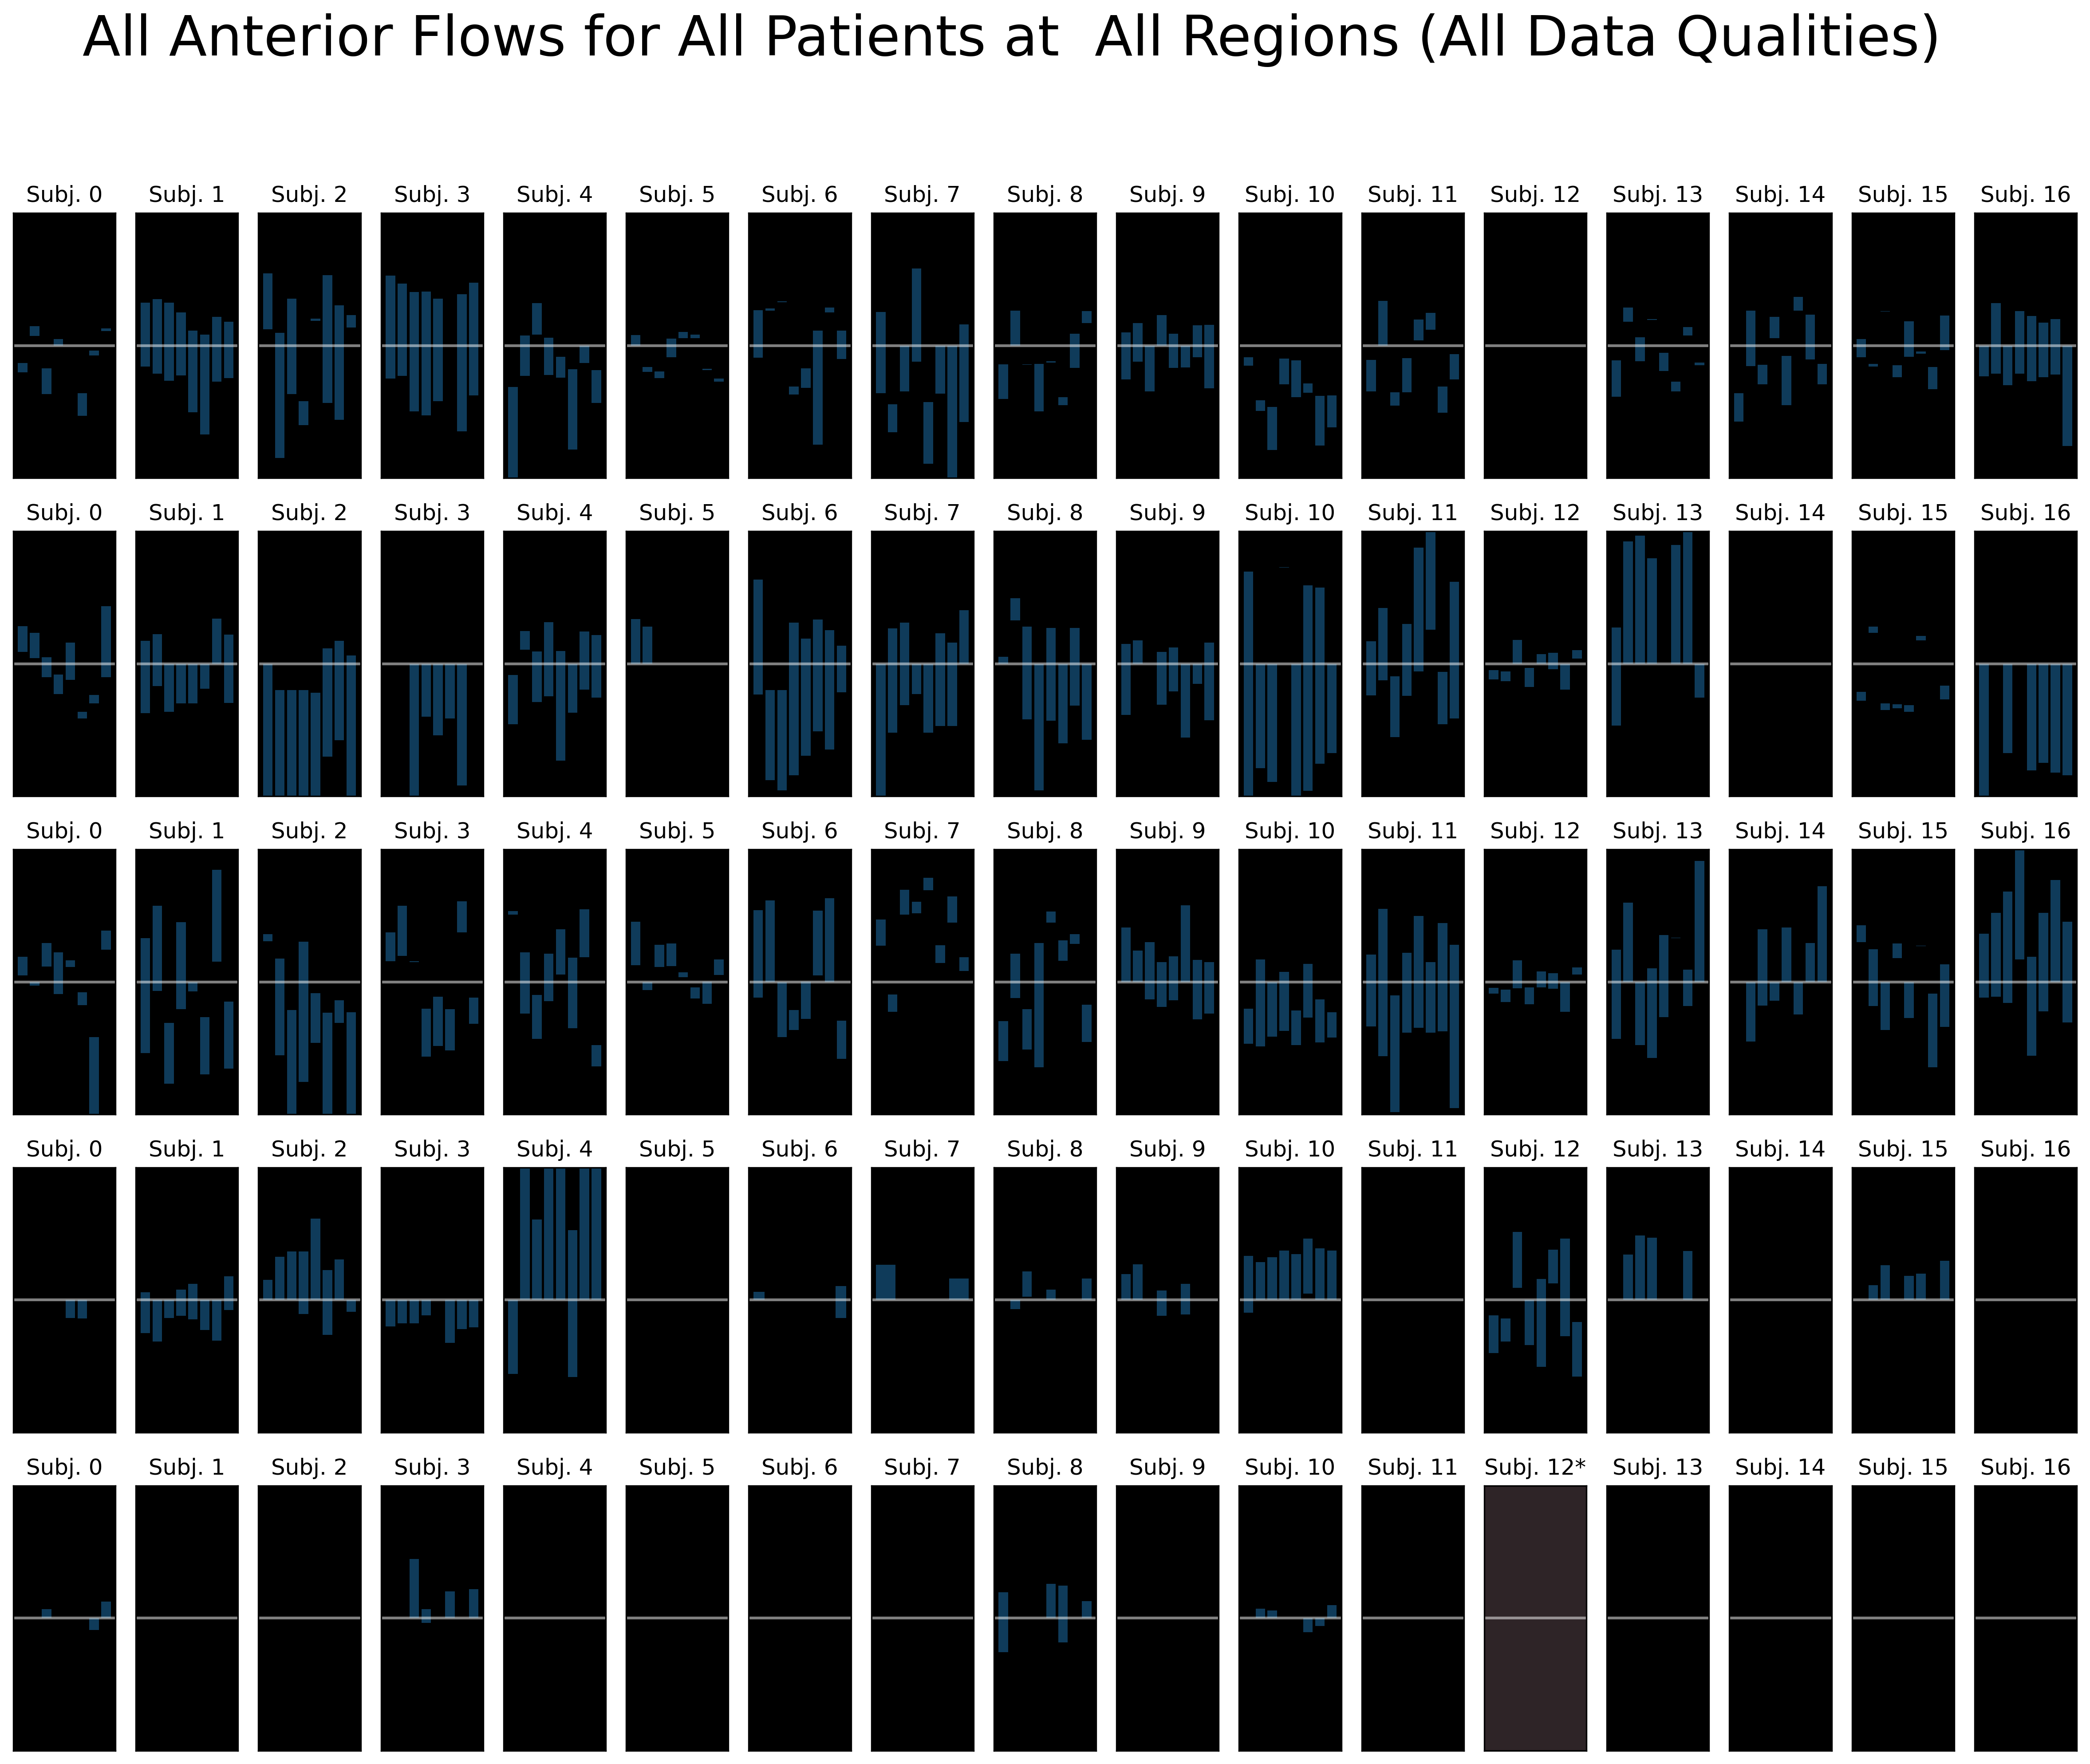

In [6]:
patient_ids = csf_flow_df['patient_id'].unique()
patient_count = csf_flow_df['patient_id'].nunique()
spinal_regions = ['C2-3', 'C5-6', 'T1-2', 'T3-4', 'T6-7']
region_count = len(spinal_regions)
images_per_patient_per_region = 8

fig, axes = plt.subplots(region_count, patient_count, figsize=(20, 15))

def get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region):
    # Get data from the CSF flow data frame for one patient in one vertebral region (`C2-3`, etc.)
    data = csf_flow_df[(csf_flow_df['patient_id'] == patient_id) & (csf_flow_df['spinal_region'] == spinal_region)]
    return data

def calculate_bar_bottom_and_height(superior_boundary, inferior_boundary):
    # Use the measurements of the displacement of the superior and inferior boundaries to calc the graph's bar's height
    results = {
        'top': None,
        'bottom': None
    }
    results['top'] = abs(superior_boundary - inferior_boundary)
    results['bottom'] = min([superior_boundary, inferior_boundary])
    return results

x_axis_labels = list(range(1, images_per_patient_per_region+1))
for column in range(patient_count):
    for row in range(region_count):
        spinal_region = spinal_regions[row]
        patient_id = patient_ids[column]

        graph_data = get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region)
        bar_dimensions = [calculate_bar_bottom_and_height(data[0], data[1])
                            for data in zip(graph_data['super_ante_displacement'], graph_data['infer_ante_displacement'])]
        tops = [item['top'] for item in bar_dimensions]
        bottoms = [item['bottom'] for item in bar_dimensions]

        axes[row][column].set_facecolor('black')
        axes[row][column].set_xticks([])
        axes[row][column].set_yticks([])
        axes[row][column].set_title(f'{row}, {column}')
        axes[row][column].axhline(y=0, color='w', alpha=0.5)
        axes[row][column].set_ylim(-25, 25)

        # Format graph title
        graph_title = f'Subj. {column}'

        for i in range(images_per_patient_per_region):
            try:
                axes[row][column].bar(i, tops[i], bottom=bottoms[i], alpha=0.5, color='tab:blue')
            except IndexError as e:
                axes[row][column].set_facecolor('#2e2427')

                # Mark graph title with a `*` if one of the measurements is can't be shown
                if graph_title[-1] != '*': 
                    graph_title += '*'

        axes[row][column].set_title(graph_title)
            
fig.suptitle('All Anterior Flows for All Patients at  All Regions (All Data Qualities)', fontsize=30)

# Show All Posterior Flows for All Patients in All Regions (All Data Qualities)

Below is a group of graphs that show every measurement of CSF flow for every participant at all 5 intervertebral regions of their spine (C1-2, C5-6, T1-2, T3-4, T6-7) in the **posterior** spinal canal.

**NOTE:** This includes measurements from images of all quality ratings (`high`, `medium`, and `low`). Graphs that only include "medium" and "high" quality data are available in subsequent sections.

**NOTE:** Regions where one or more measurements were given an "unreadable" quality rating have a `*` in their titles and a dark gray background, as opposed to black. This is to differentiate missing measurements from true `0` measurements.

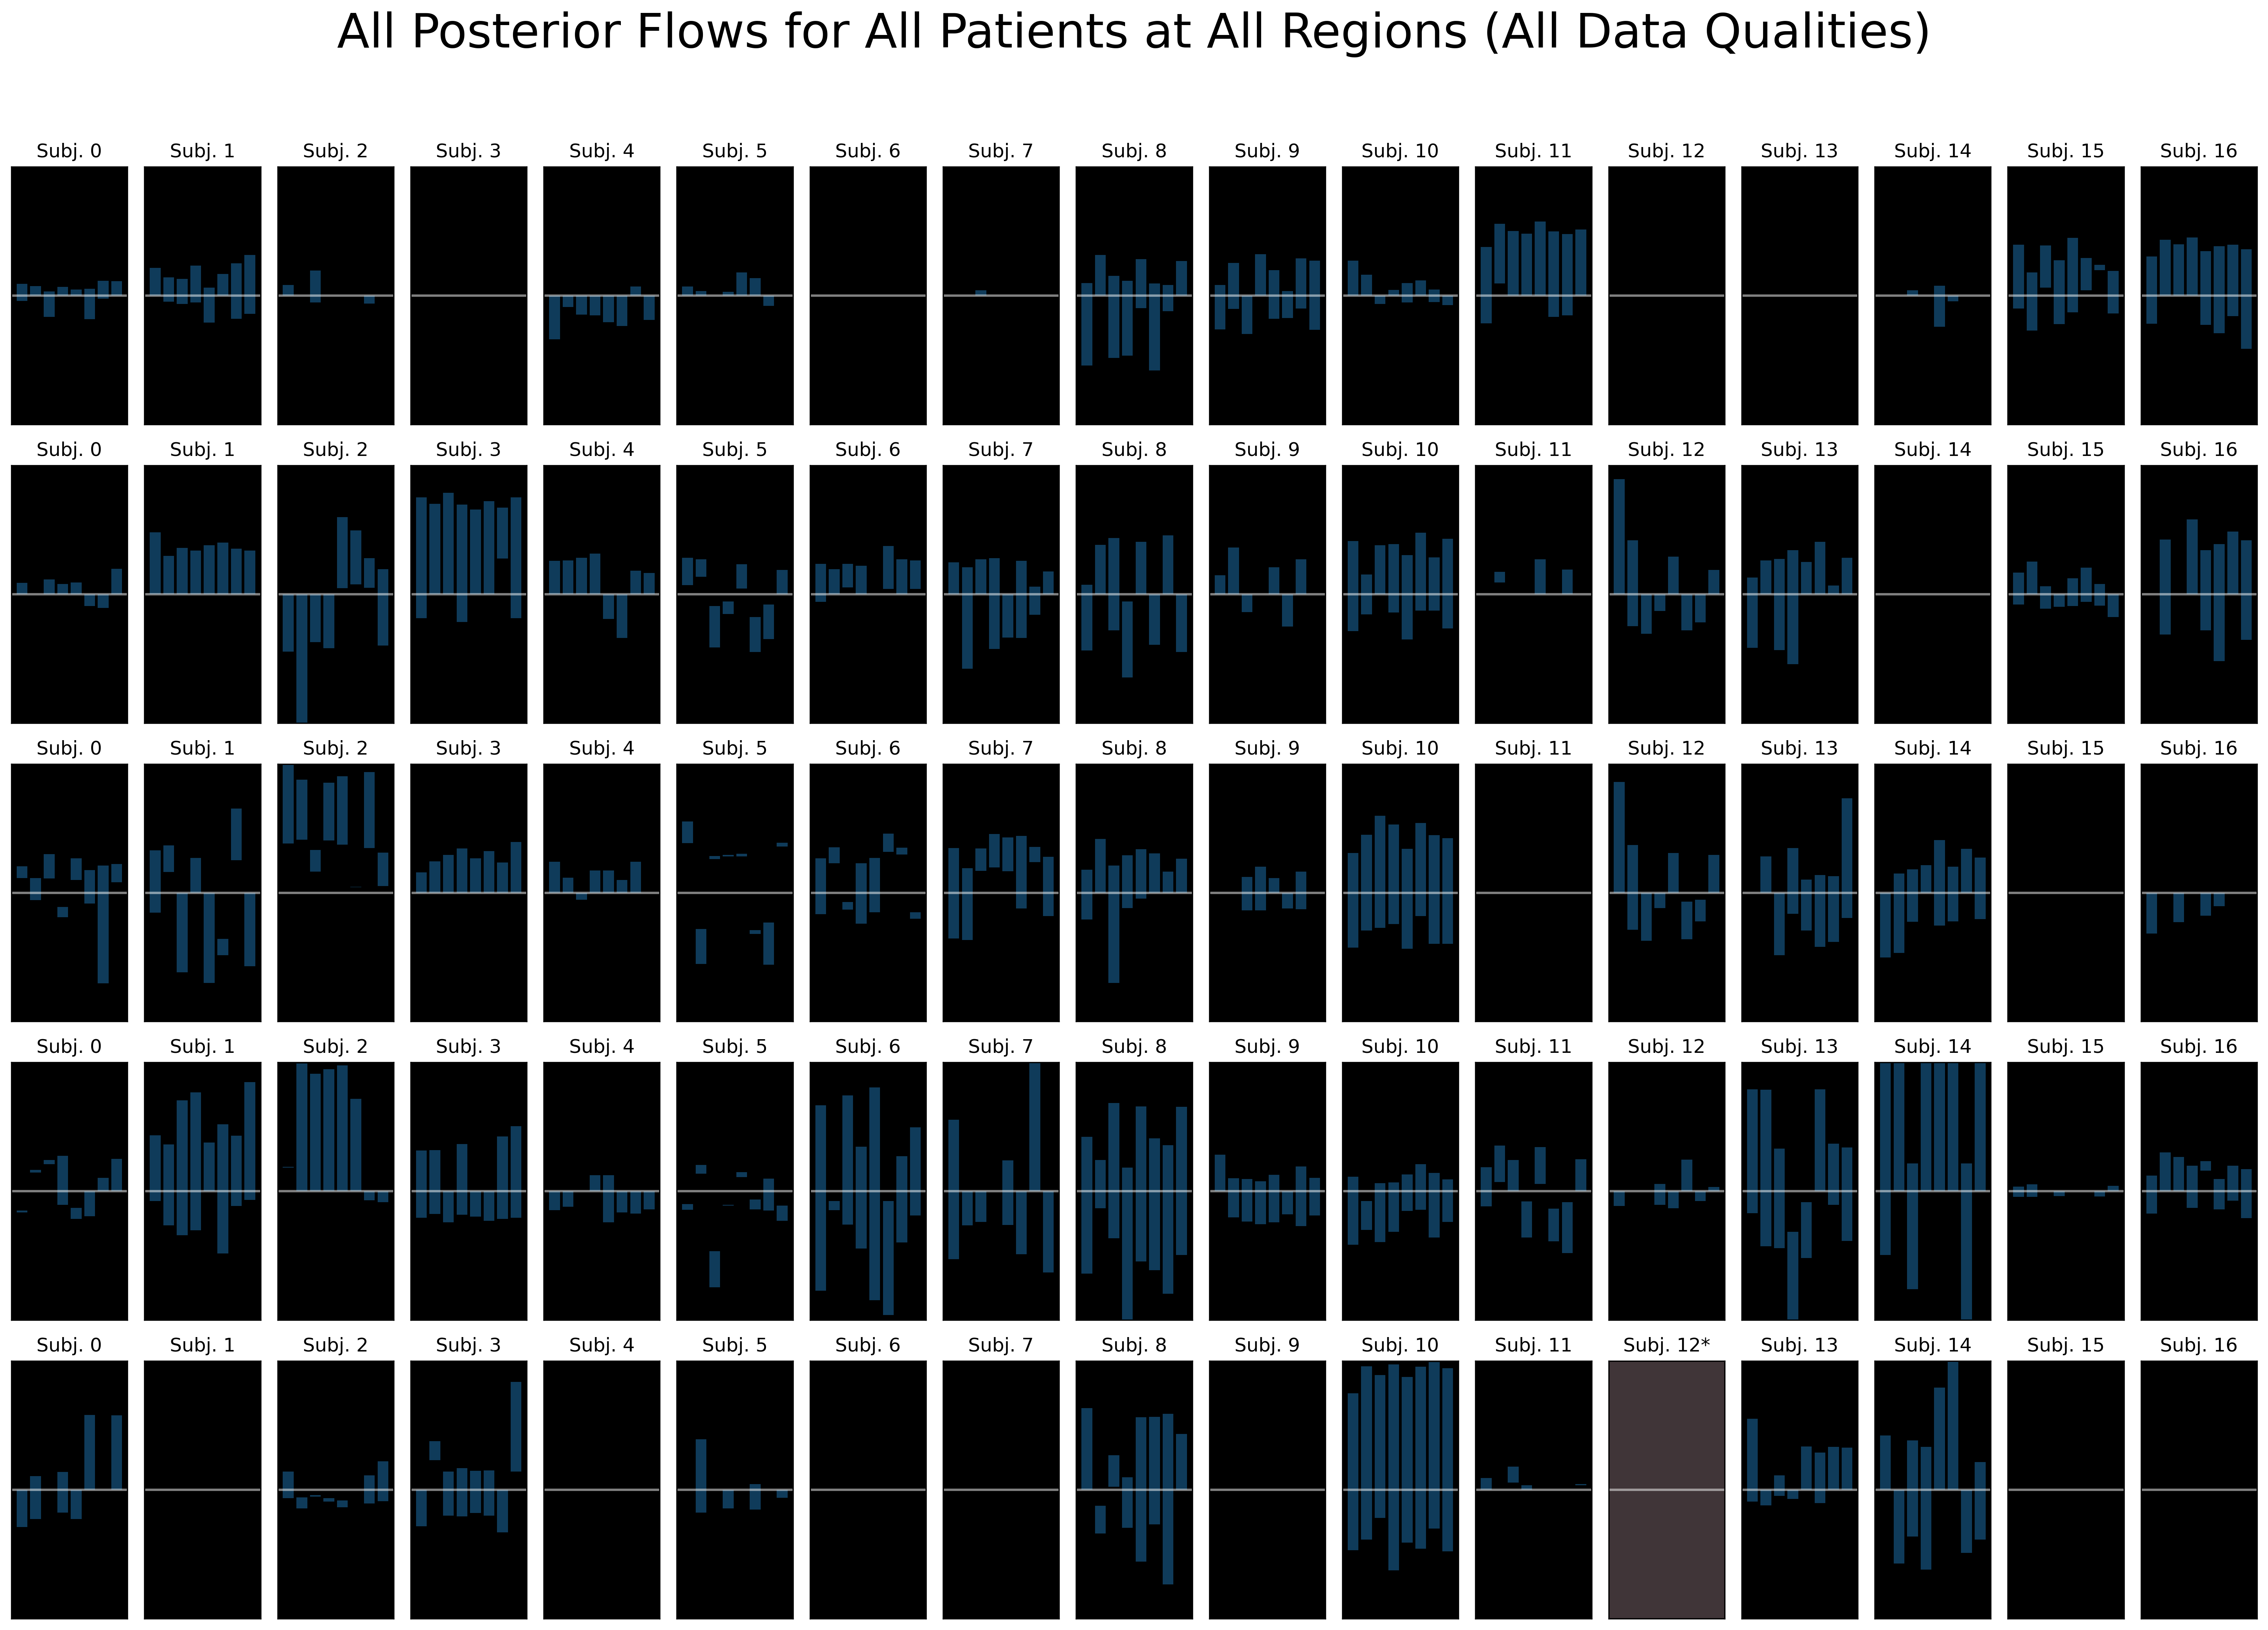

In [7]:
patient_ids = csf_flow_df['patient_id'].unique()
patient_count = csf_flow_df['patient_id'].nunique()
spinal_regions = ['C2-3', 'C5-6', 'T1-2', 'T3-4', 'T6-7']
region_count = len(spinal_regions)
images_per_patient_per_region = 8

fig, axes = plt.subplots(region_count, patient_count, figsize=(20, 15))

def get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region):
    # Get data from the CSF flow data frame for one patient in one vertebral region (`C2-3`, etc.)
    data = csf_flow_df[(csf_flow_df['patient_id'] == patient_id) & (csf_flow_df['spinal_region'] == spinal_region)]
    return data

def calculate_bar_bottom_and_height(superior_boundary, inferior_boundary):
    # Use the measurements of the displacement of the superior and inferior boundaries to calc graph's bar's height
    results = {
        'top': None,
        'bottom': None
    }
    results['top'] = abs(superior_boundary - inferior_boundary)
    results['bottom'] = min([superior_boundary, inferior_boundary])
    return results

x_axis_labels = list(range(1, images_per_patient_per_region+1))
for column in range(patient_count):
    for row in range(region_count):
        spinal_region = spinal_regions[row]
        patient_id = patient_ids[column]

        graph_data = get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region)
        bar_dimensions = [calculate_bar_bottom_and_height(data[0], data[1])
                            for data in zip(graph_data['super_post_displacement'], graph_data['infer_post_displacement'])]
        tops = [item['top'] for item in bar_dimensions]
        bottoms = [item['bottom'] for item in bar_dimensions]

        axes[row][column].set_facecolor('black')
        axes[row][column].set_xticks([])
        axes[row][column].set_yticks([])
        axes[row][column].set_title(f'{row}, {column}')
        axes[row][column].axhline(y=0, color='w', alpha=0.5)
        axes[row][column].set_ylim(-25, 25)

        # Format graph title
        graph_title = f'Subj. {column}'

        for i in range(images_per_patient_per_region):
            try:
                axes[row][column].bar(i, tops[i], bottom=bottoms[i], alpha=0.5, color='tab:blue')
            except IndexError as e:
                axes[row][column].set_facecolor('#403538')

                # Mark graph title with a `*` if one of the measurements is can't be shown
                if graph_title[-1] != '*': 
                    graph_title += '*'

        axes[row][column].set_title(graph_title)
            
fig.suptitle('All Posterior Flows for All Patients at All Regions (All Data Qualities)', fontsize=30)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show All Anterior Flows for All Patients in All Regions (Medium and High Quality Only)

Below is a group of graphs that show every measurement of CSF flow for every participant at all 5 intervertebral regions of their spine (C1-2, C5-6, T1-2, T3-4, T6-7) in the **anterior** spinal canal. A similar graph for the posterior CSF flow measurements is in the next section.

**NOTE:** This includes measurements only from images with `high` or `medium` quality ratings. Graphs that include measurements of all quality ratings are available in previous sections.

**NOTE:** Regions where one or more measurements were given a "low" or "unreadable" quality rating have a `*` in their titles and a dark gray background, as opposed to black. This is to differentiate missing measurements from true `0` measurements.

Text(0.5, 0.98, 'All Anterior Flows for All Patients at  All Regions (Medium- and High-Quality Only)')

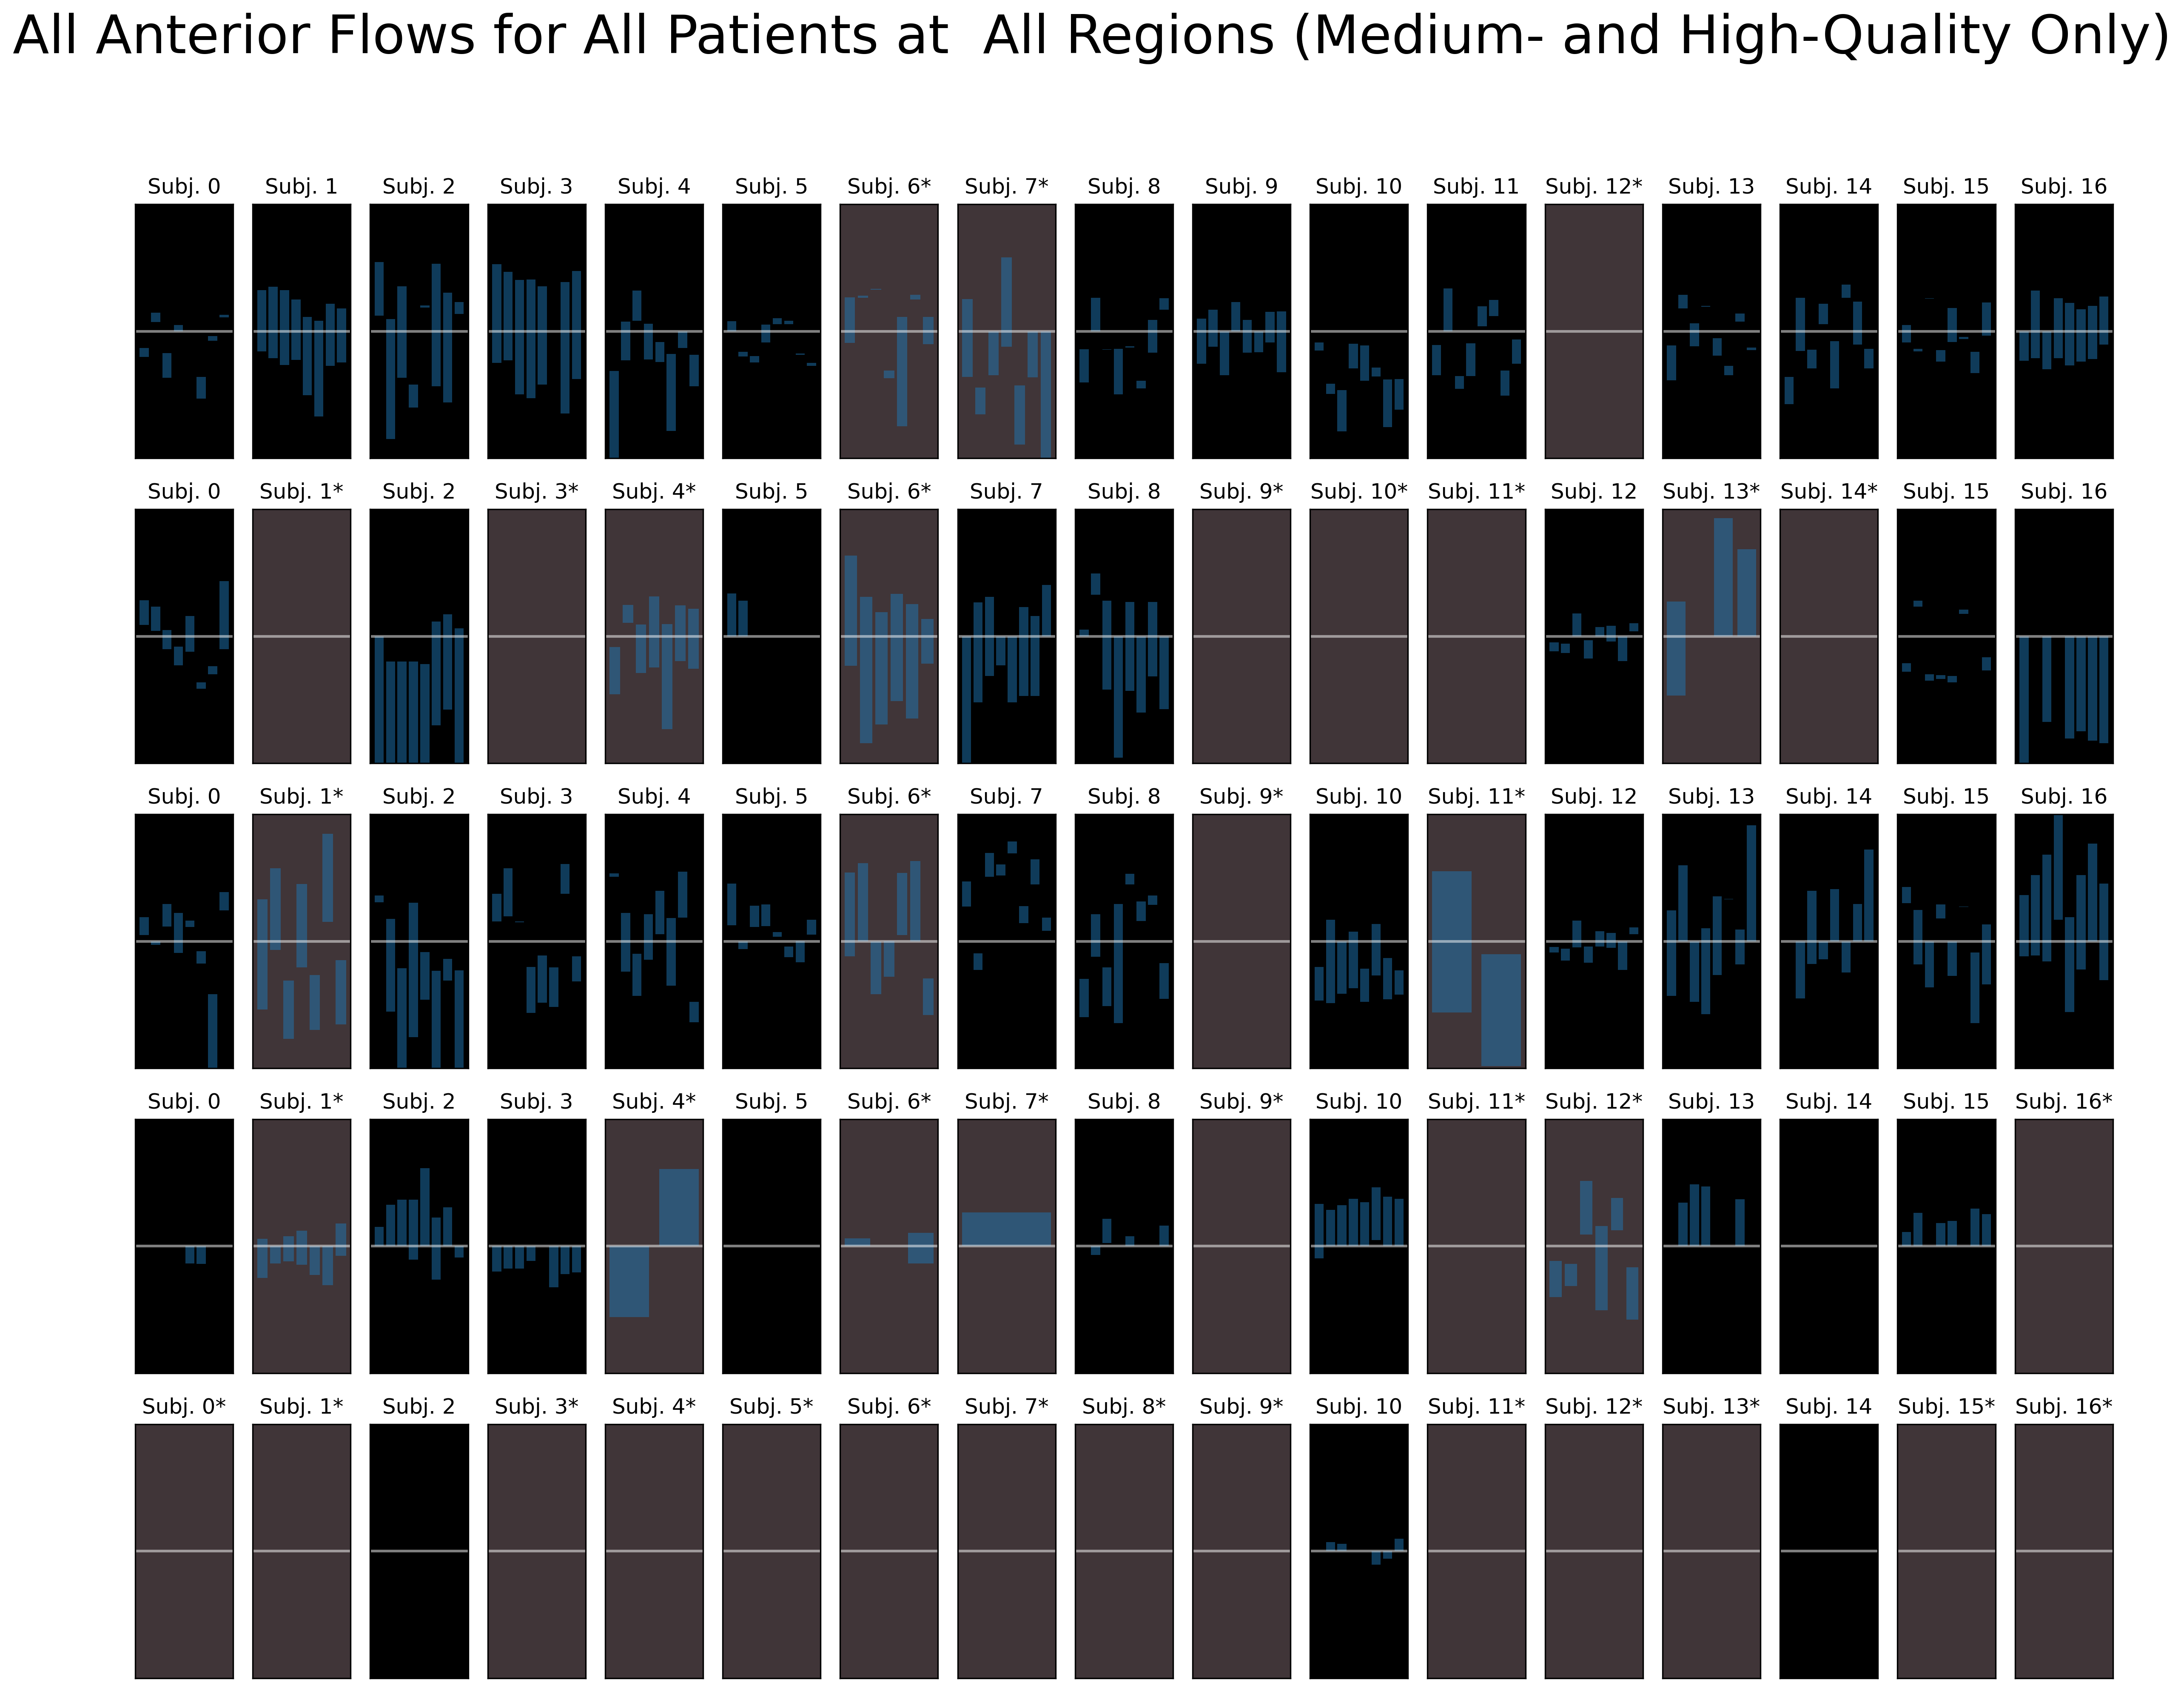

In [8]:
patient_ids = csf_flow_high_med['patient_id'].unique()
patient_count = csf_flow_high_med['patient_id'].nunique()
spinal_regions = ['C2-3', 'C5-6', 'T1-2', 'T3-4', 'T6-7']
region_count = len(spinal_regions)
images_per_patient_per_region = 8

fig, axes = plt.subplots(region_count, patient_count, figsize=(20, 15))

def get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region):
    # Get data from the CSF flow data frame for one patient in one vertebral region (`C2-3`, etc.)
    data = csf_flow_high_med[(csf_flow_high_med['patient_id'] == patient_id) & (csf_flow_high_med['spinal_region'] == spinal_region)]
    return data

def calculate_bar_bottom_and_height(superior_boundary, inferior_boundary):
    # Use the measurements of the displacement of the superior and inferior boundaries to calc the graph's bar's height
    results = {
        'top': None,
        'bottom': None
    }
    results['top'] = abs(superior_boundary - inferior_boundary)
    results['bottom'] = min([superior_boundary, inferior_boundary])
    return results

x_axis_labels = list(range(1, images_per_patient_per_region+1))
for column in range(patient_count):
    for row in range(region_count):
        spinal_region = spinal_regions[row]
        patient_id = patient_ids[column]

        graph_data = get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region)
        bar_dimensions = [calculate_bar_bottom_and_height(data[0], data[1])
                            for data in zip(graph_data['super_ante_displacement'], graph_data['infer_ante_displacement'])]
        tops = [item['top'] for item in bar_dimensions]
        bottoms = [item['bottom'] for item in bar_dimensions]

        axes[row][column].set_facecolor('black')
        axes[row][column].set_xticks([])
        axes[row][column].set_yticks([])
        axes[row][column].set_title(f'{row}, {column}')
        axes[row][column].axhline(y=0, color='w', alpha=0.5)
        axes[row][column].set_ylim(-25, 25)

        # Format graph title
        graph_title = f'Subj. {column}'

        for i in range(images_per_patient_per_region):
            try:
                axes[row][column].bar(i, tops[i], bottom=bottoms[i], alpha=0.5, color='tab:blue')
            except IndexError as e:
                axes[row][column].set_facecolor('#403538')

                # Mark graph title with a `*` if one of the measurements is can't be shown
                if graph_title[-1] != '*': 
                    graph_title += '*'

        axes[row][column].set_title(graph_title)
            
fig.suptitle('All Anterior Flows for All Patients at  All Regions (Medium- and High-Quality Only)', fontsize=30)

# Show All Posterior Flows for All Patients in All Regions (Medium and High Quality Only)

Below is a group of graphs that show every measurement of CSF flow for every participant at all 5 intervertebral regions of their spine (C1-2, C5-6, T1-2, T3-4, T6-7) in the **posterior** spinal canal.

**NOTE:** This includes measurements only from images with `high` or `medium` quality ratings. Graphs that include measurements of all quality ratings are available in previous sections.

**NOTE:** Regions where one or more measurements were given an "unreadable" quality rating have a `*` in their titles and a dark gray background, as opposed to black. This is to differentiate missing measurements from true `0` measurements.

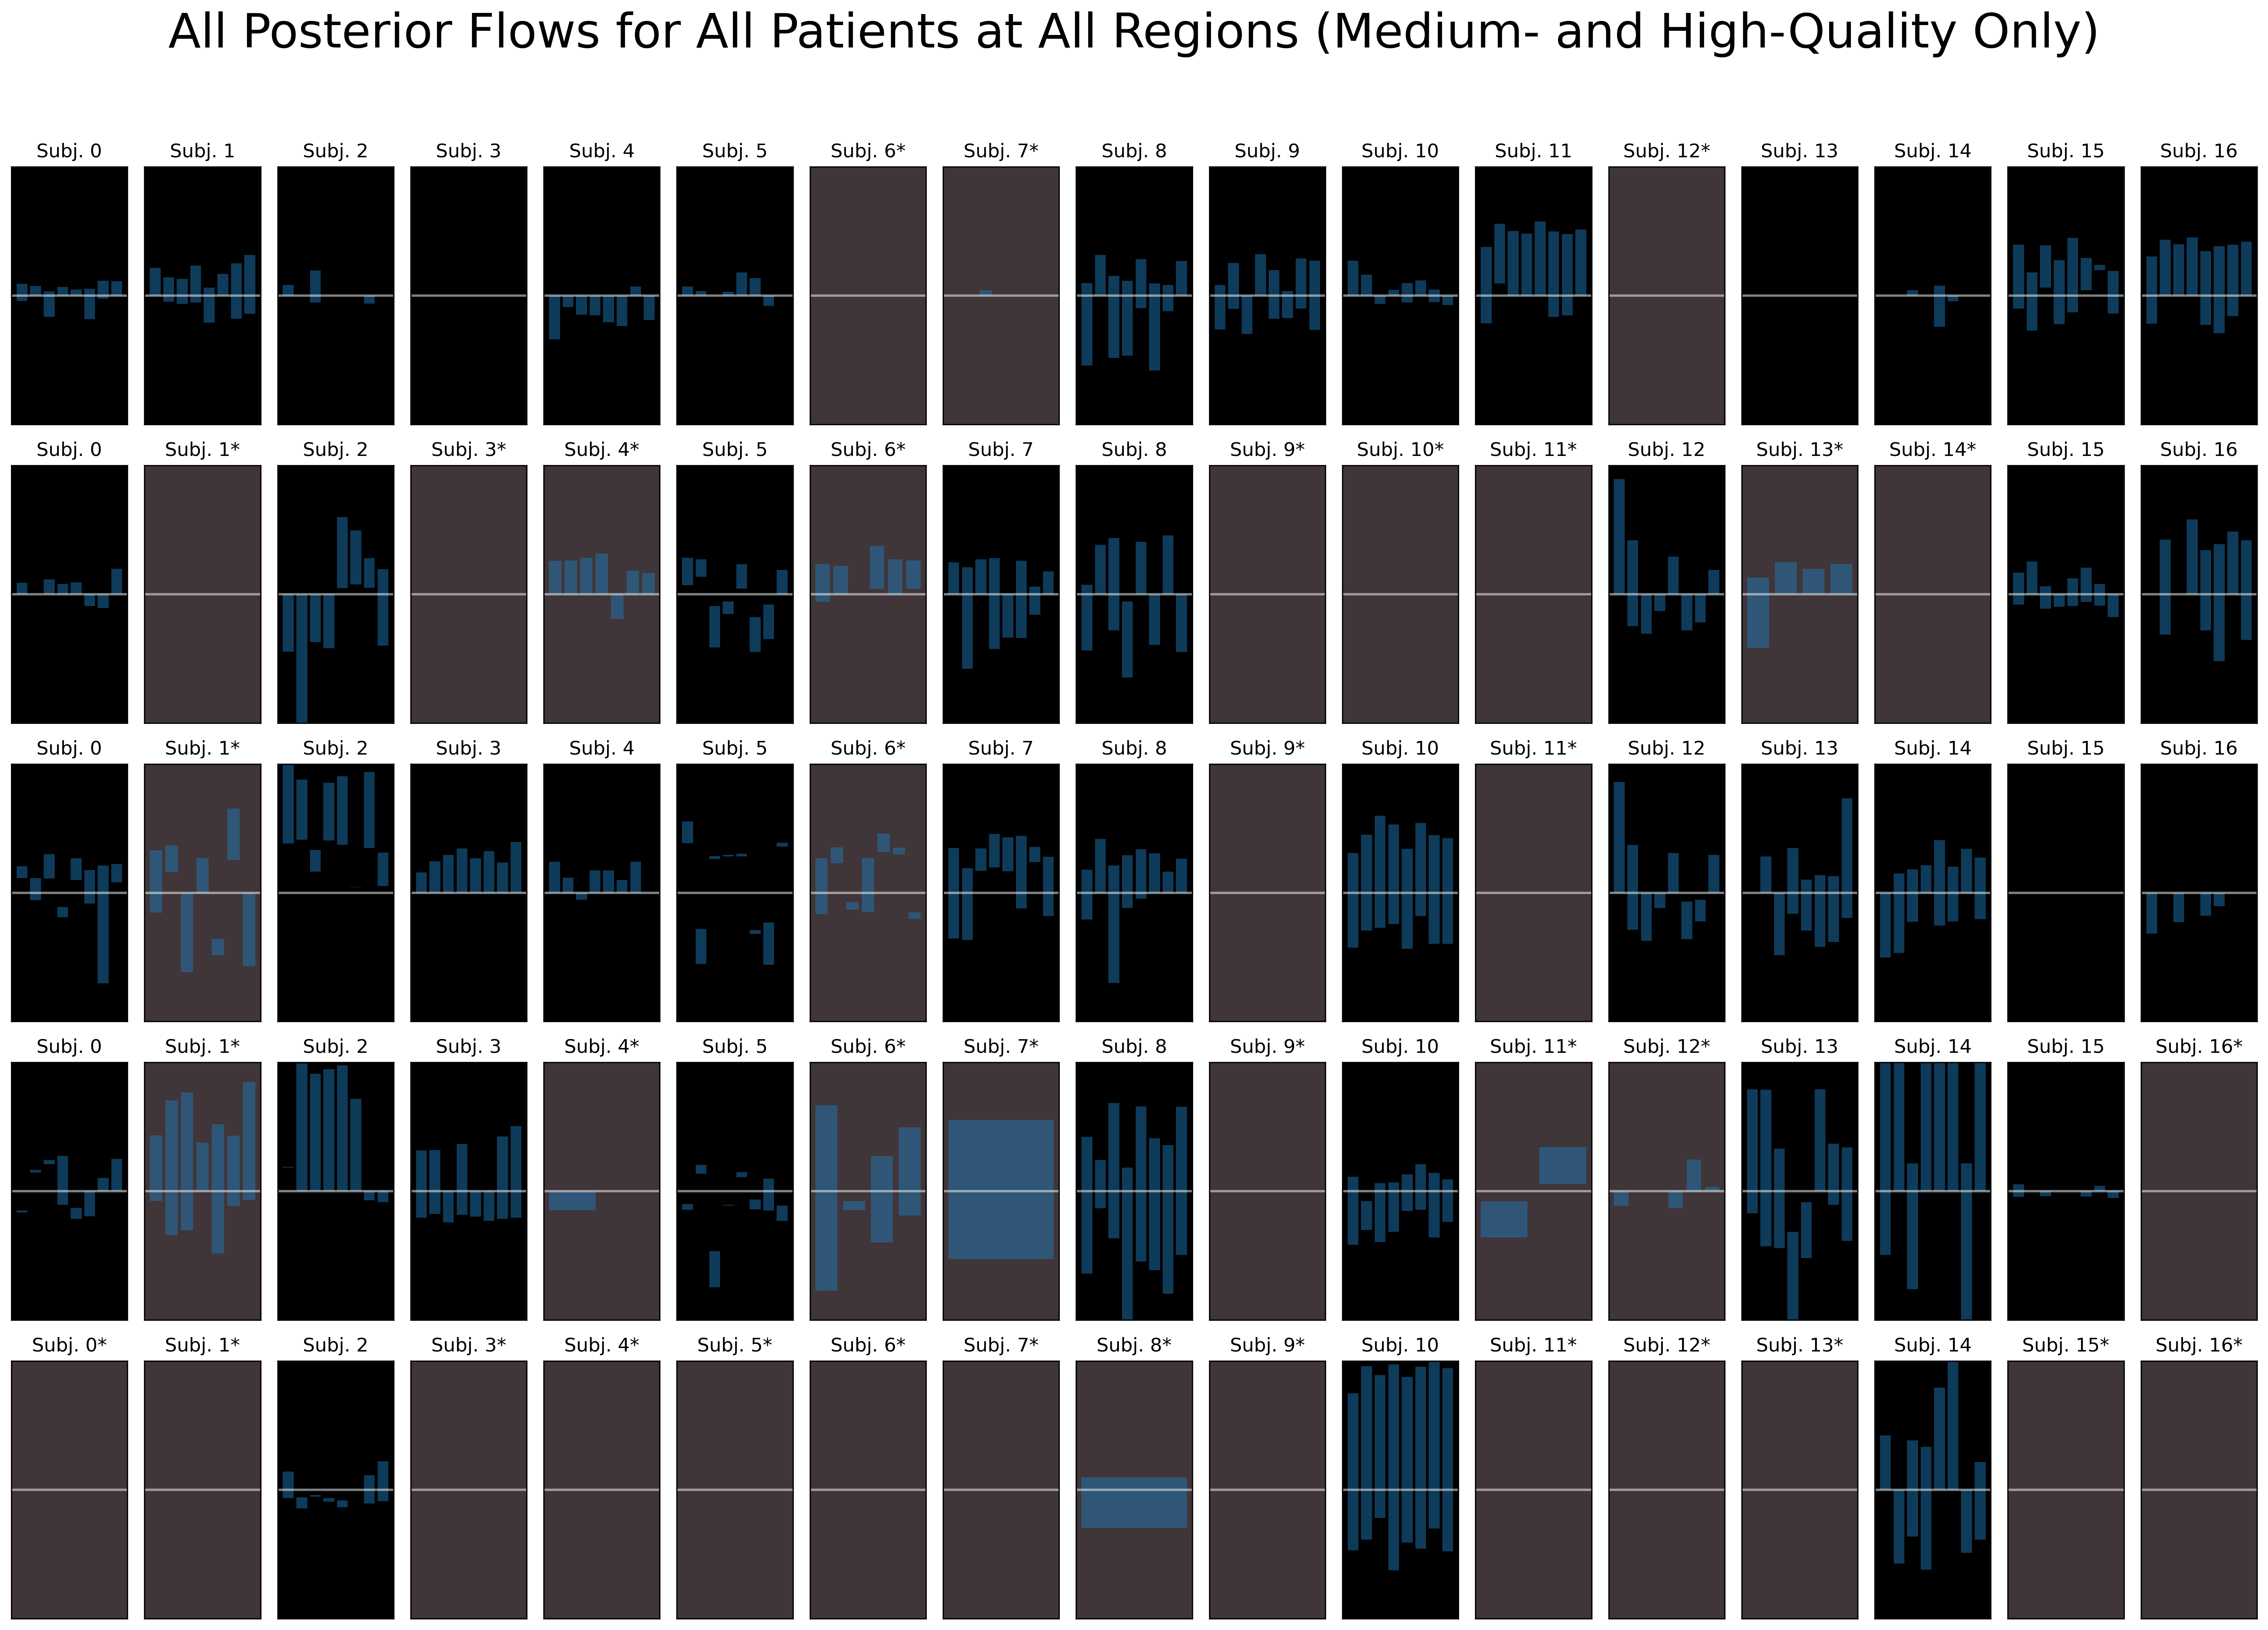

In [9]:
patient_ids = csf_flow_high_med['patient_id'].unique()
patient_count = csf_flow_high_med['patient_id'].nunique()
spinal_regions = ['C2-3', 'C5-6', 'T1-2', 'T3-4', 'T6-7']
region_count = len(spinal_regions)
images_per_patient_per_region = 8

fig, axes = plt.subplots(region_count, patient_count, figsize=(20, 15))

def get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region):
    # Get data from the CSF flow data frame for one patient in one vertebral region (`C2-3`, etc.)
    data = csf_flow_high_med[(csf_flow_high_med['patient_id'] == patient_id) & (csf_flow_high_med['spinal_region'] == spinal_region)]
    return data

def calculate_bar_bottom_and_height(superior_boundary, inferior_boundary):
    # Use the measurements of the displacement of the superior and inferior boundaries to calc graph's bar's height
    results = {
        'top': None,
        'bottom': None
    }
    results['top'] = abs(superior_boundary - inferior_boundary)
    results['bottom'] = min([superior_boundary, inferior_boundary])
    return results

x_axis_labels = list(range(1, images_per_patient_per_region+1))
for column in range(patient_count):
    for row in range(region_count):
        spinal_region = spinal_regions[row]
        patient_id = patient_ids[column]
        #print(f'spinal_region: {spinal_region}')
        #print(f'patient_id: {patient_id}')

        graph_data = get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region)
        bar_dimensions = [calculate_bar_bottom_and_height(data[0], data[1])
                            for data in zip(graph_data['super_post_displacement'], graph_data['infer_post_displacement'])]
        tops = [item['top'] for item in bar_dimensions]
        bottoms = [item['bottom'] for item in bar_dimensions]

        axes[row][column].set_facecolor('black')
        axes[row][column].set_xticks([])
        axes[row][column].set_yticks([])
        axes[row][column].set_title(f'{row}, {column}')
        axes[row][column].axhline(y=0, color='w', alpha=0.5)
        axes[row][column].set_ylim(-25, 25)

        # Format graph title
        graph_title = f'Subj. {column}'

        for i in range(images_per_patient_per_region):
            try:
                axes[row][column].bar(i, tops[i], bottom=bottoms[i], alpha=0.5, color='tab:blue')
            except IndexError as e:
                axes[row][column].set_facecolor('#403538')

                # Mark graph title with a `*` if one of the measurements is can't be shown
                if graph_title[-1] != '*': 
                    graph_title += '*'

        axes[row][column].set_title(graph_title)            
fig.suptitle('All Posterior Flows for All Patients at All Regions (Medium- and High-Quality Only)', fontsize=30)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Measurements of All 8 Images from Each Participant as an Overlay (Posterior Only)

Each participant had 8 images taken of each section of their spine (though the last 4 participants had 30 images). We wanted to explore whether there were broader patterns in CSF flow over an 8-image span, which led us to produce the graph below.

A pattern was not apparent from 8 images alone. We propose that it is actually impractical to find one with this method, given that the CSF oscillates faster than the sample rate at which TimeSTAMP acquired these images (60 Hz vs. 0.125 Hz, respectively), meaning that the signal does not meet [Nyquist criteria](https://www.sciencedirect.com/topics/engineering/nyquist-theorem).

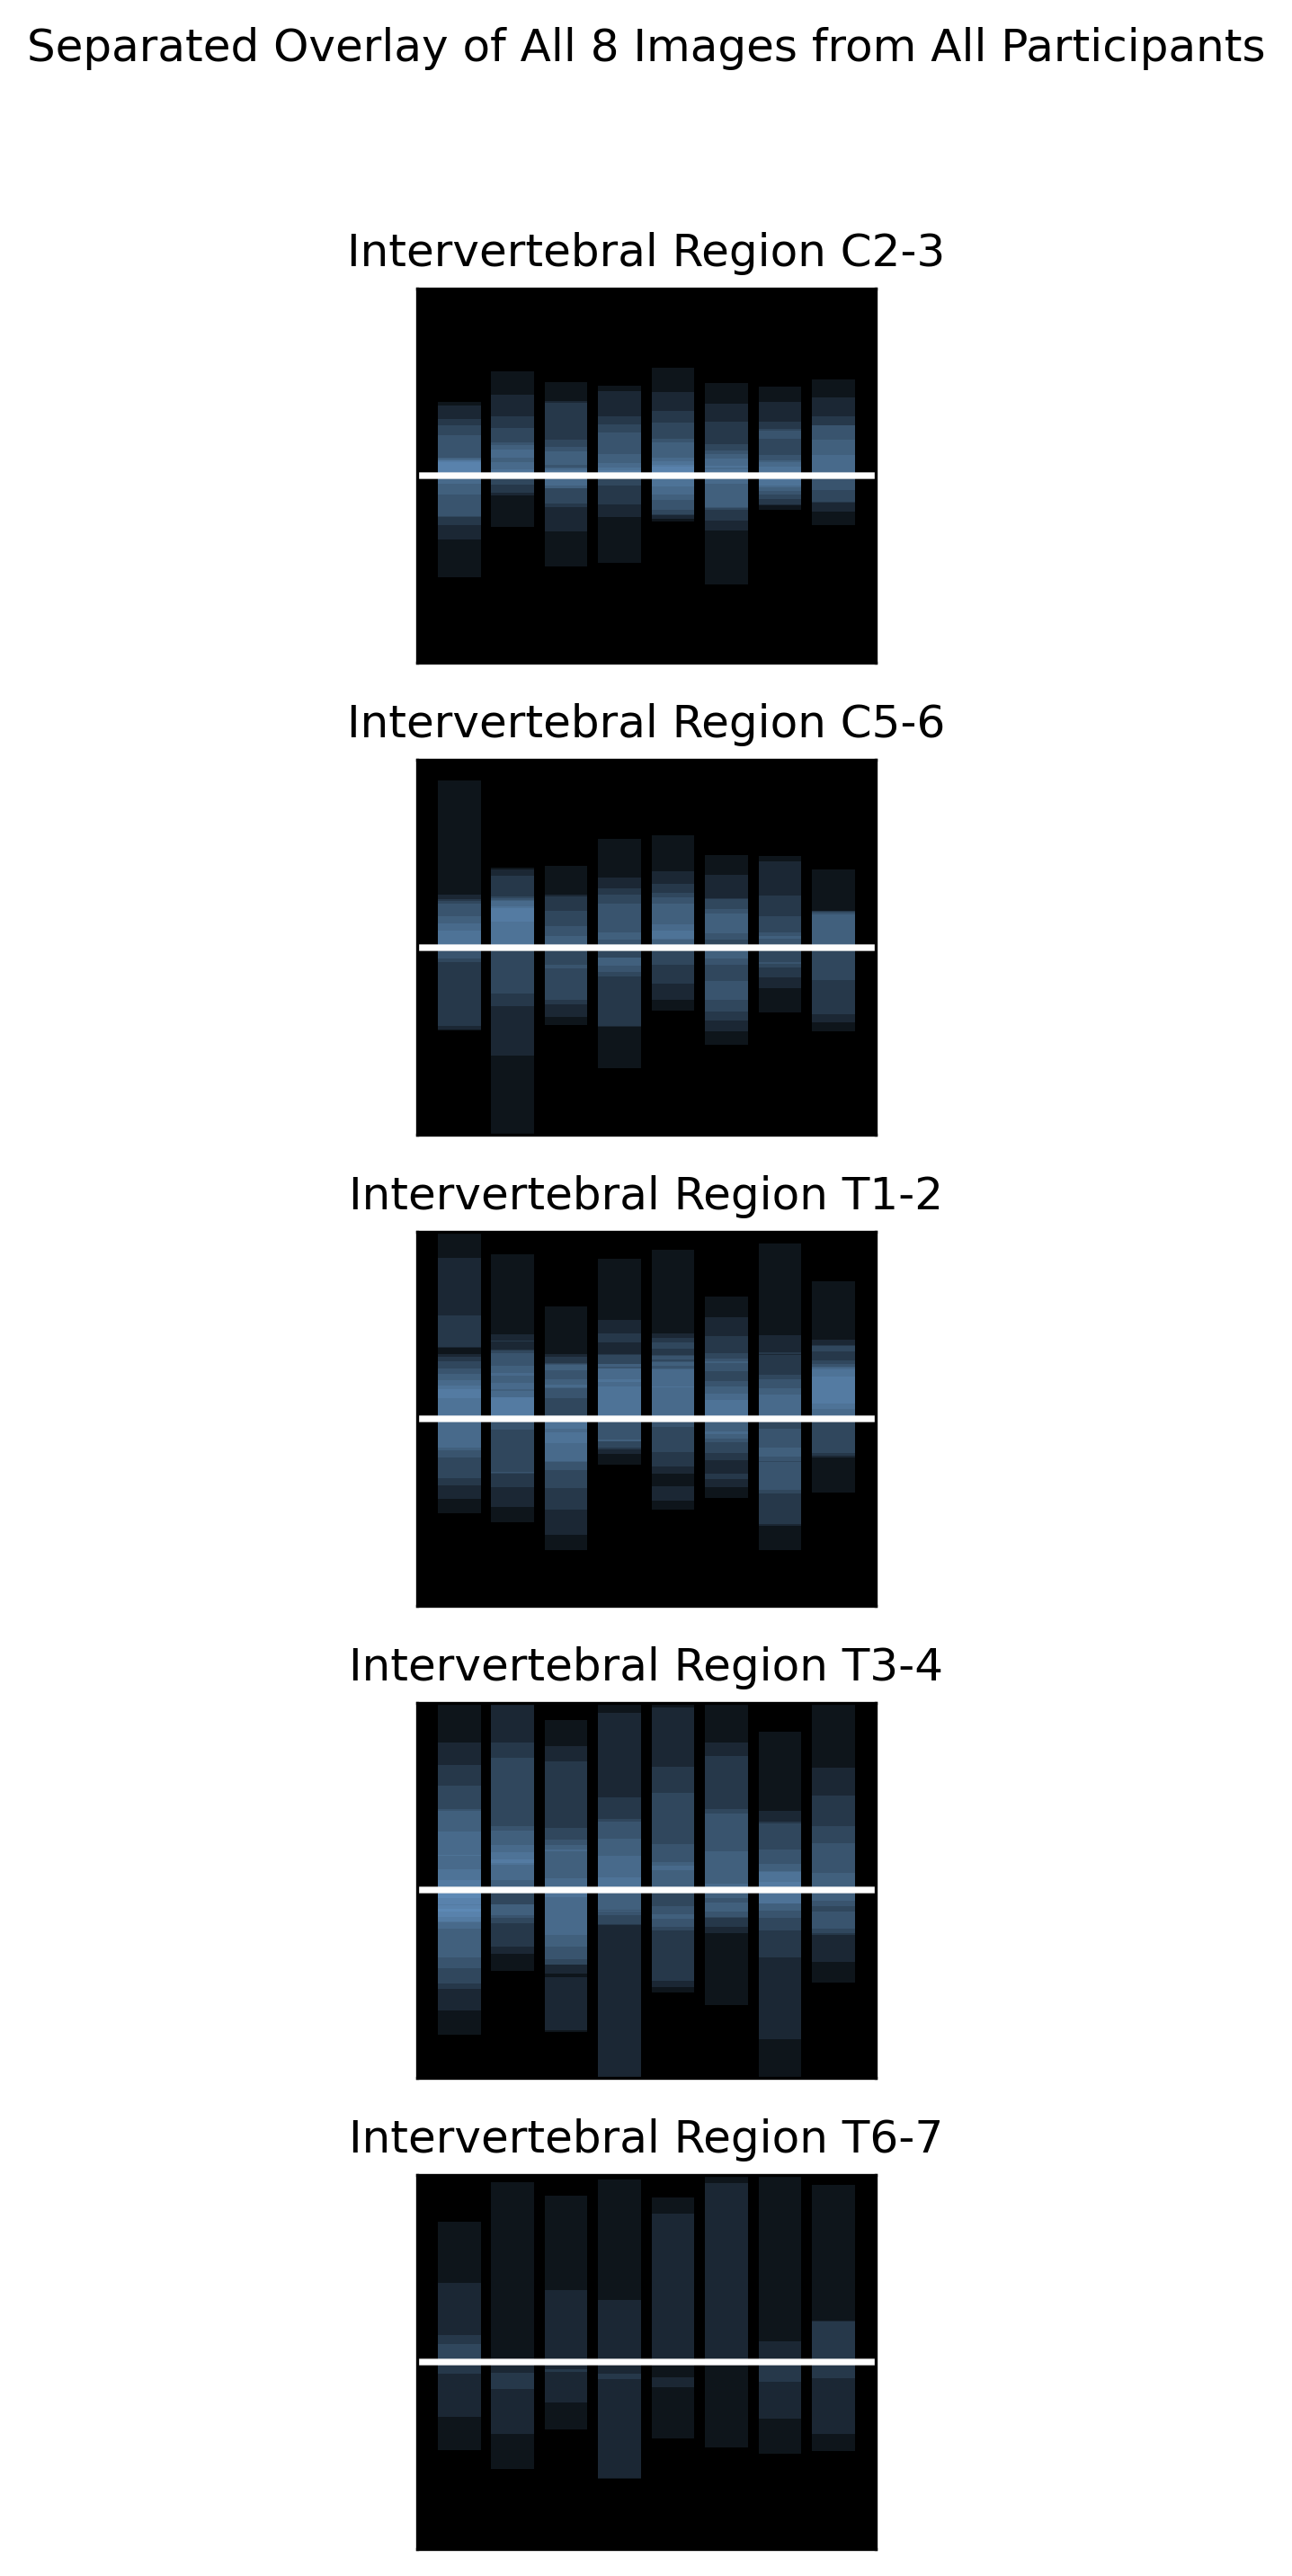

In [10]:
patient_ids = csf_flow_high_med['patient_id'].unique()
patient_count = csf_flow_high_med['patient_id'].nunique()
spinal_regions = ['C2-3', 'C5-6', 'T1-2', 'T3-4', 'T6-7']
region_count = len(spinal_regions)
images_per_patient_per_region = 8

fig, axes = plt.subplots(region_count, 1, figsize=(2, 10))

def get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region):
    # Get data from the CSF flow data frame for one patient in one vertebral region (`C2-3`, etc.)
    data = csf_flow_high_med[(csf_flow_high_med['patient_id'] == patient_id) & (csf_flow_high_med['spinal_region'] == spinal_region)]
    return data

def calculate_bar_bottom_and_height(superior_boundary, inferior_boundary):
    # Use the measurements of the displacement of the superior and inferior boundaries to calc graph's bar's height
    results = {
        'top': None,
        'bottom': None
    }
    results['top'] = abs(superior_boundary - inferior_boundary)
    results['bottom'] = min([superior_boundary, inferior_boundary])
    return results

x_axis_labels = list(range(1, images_per_patient_per_region+1))
for i in range(len(axes)):
    for patient_id in patient_ids:
        graph_data = get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_regions[i])
        bar_dimensions = [calculate_bar_bottom_and_height(data[0], data[1])
                            for data in zip(graph_data['super_post_displacement'], graph_data['infer_post_displacement'])]
        tops = [item['top'] for item in bar_dimensions]
        bottoms = [item['bottom'] for item in bar_dimensions]

        axes[i].set_facecolor('black')
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_title(f'Intervertebral Region {spinal_regions[i]}')
        axes[i].axhline(y=0, color='w', alpha=0.5)
        axes[i].set_ylim(-25, 25)

        for j in range(images_per_patient_per_region):
            try:
                axes[i].bar(j, tops[j], bottom=bottoms[j], alpha=0.11, color='#85c2ff')
            except IndexError as e:
                pass
            
fig.suptitle('Separated Overlay of All 8 Images from All Participants')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Anterior vs. Posterior Flow Bias for All Participants (Medium- and High-Quality Data)

The heatmap below shows the differences in CSF flow between the anterior and posterior spaces. As discussed in the manuscript, there is a pronounced downward (or caudal) bias in flow in the anterior cervical spine that lessens and then reverses as we moved toward the thoracic spine and then toward the posterior cervical space.

NOTE: This graph only includes `medium` and `high` quality data. A graph with data from all quality ratings is available in the next section.

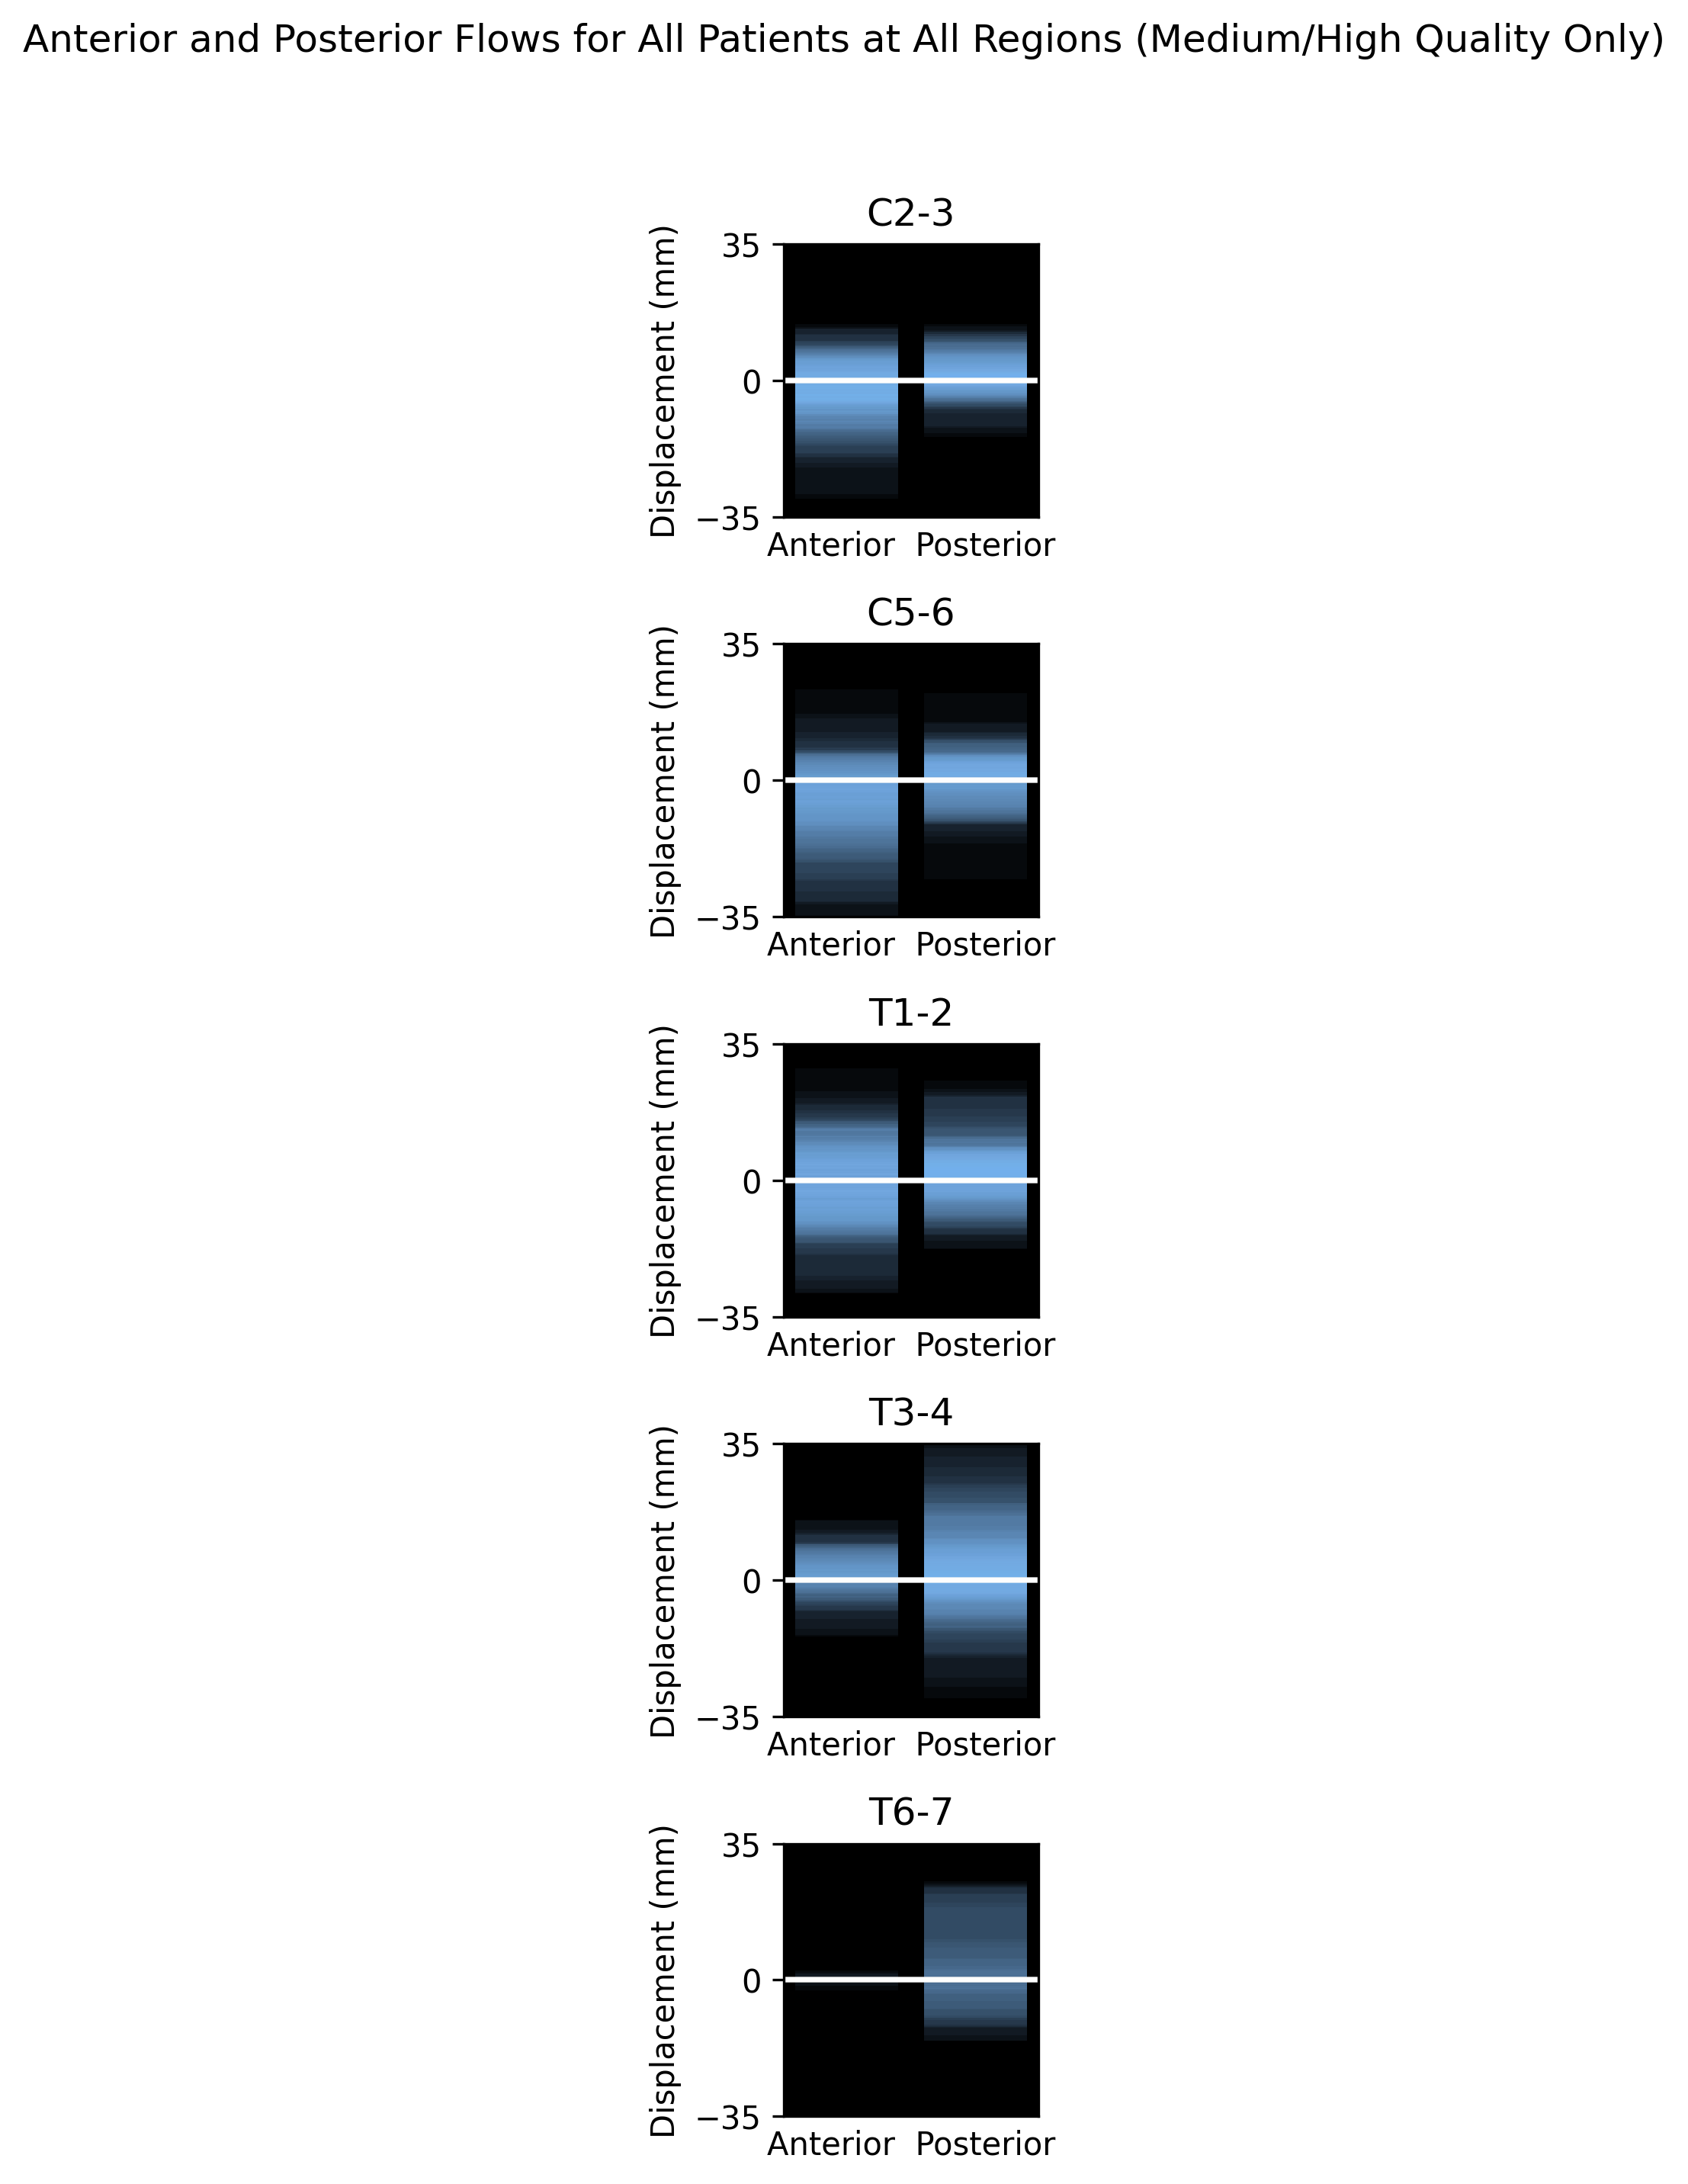

In [11]:
patient_ids = csf_flow_high_med['patient_id'].unique()
patient_count = csf_flow_high_med['patient_id'].nunique()
spinal_regions = ['C2-3', 'C5-6', 'T1-2', 'T3-4', 'T6-7']
region_count = len(spinal_regions)
images_per_patient_per_region = 8

fig, axes = plt.subplots(region_count, 1, figsize=(2, 10))

def get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region):
    # Get data from the CSF flow data frame for one patient in one vertebral region (`C2-3`, etc.)
    data = csf_flow_high_med[(csf_flow_high_med['patient_id'] == patient_id) & (csf_flow_high_med['spinal_region'] == spinal_region)]
    return data

def calculate_bar_bottom_and_height(superior_boundary, inferior_boundary):
    # Use the measurements of the displacement of the superior and inferior boundaries to calc graph's bar's height
    results = {
        'top': None,
        'bottom': None
    }
    results['top'] = abs(superior_boundary - inferior_boundary)
    results['bottom'] = min([superior_boundary, inferior_boundary])
    return results

x_axis_labels = list(range(1, images_per_patient_per_region+1))
for i in range(len(axes)):
    for patient_id in patient_ids:
        #print(f'Getting CSF flow data for patient {patient_id} and vertebral region {i}')
        graph_data = get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_regions[i])
        anterior_bar_dimensions = [calculate_bar_bottom_and_height(data[0], data[1])
                            for data in zip(graph_data['super_ante_displacement'], graph_data['infer_ante_displacement'])]
        anterior_tops = [item['top'] for item in anterior_bar_dimensions]
        anterior_bottoms = [item['bottom'] for item in anterior_bar_dimensions]

        posterior_bar_dimensions = [calculate_bar_bottom_and_height(data[0], data[1])
                            for data in zip(graph_data['super_post_displacement'], graph_data['infer_post_displacement'])]
        posterior_tops = [item['top'] for item in posterior_bar_dimensions]
        posterior_bottoms = [item['bottom'] for item in posterior_bar_dimensions]

        axes[i].set_facecolor('black')
        axes[i].set_xticks([])
        axes[i].set_yticks([-35, 0, 35])
        axes[i].set_xlabel('Anterior  Posterior')
        axes[i].set_ylabel('Displacement (mm)')
        axes[i].set_title(f'{spinal_regions[i]}')
        axes[i].axhline(y=0, color='w', alpha=0.5)
        axes[i].set_ylim(-35, 35)

        for j in range(images_per_patient_per_region):
            try:
                ante = axes[i].bar('Anterior', anterior_tops[j], bottom=anterior_bottoms[j], alpha=0.05, color='#85c2ff')
                post = axes[i].bar('Posterior', posterior_tops[j], bottom=posterior_bottoms[j], alpha=0.05, color='#85c2ff')
            except IndexError as e:
                pass
            
fig.suptitle('Anterior and Posterior Flows for All Patients at All Regions (Medium/High Quality Only)')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Same anterior/posterior heatmap as above but with data of all qualities (except "Unreadable")

The heatmap below shows the differences in CSF flow between the anterior and posterior spaces. As discussed in the manuscript, there is a pronounced downward (or caudal) bias in flow in the anterior cervical spine that lessens and then reverses as we moved toward the thoracic spine and then toward the posterior cervical space.

This is the heatmap figure included in the technical report for the American Journal of Neurorad

NOTE: This data includes data of all qualities (`high`, `medium`, and `low`), except for `unreadable` images.

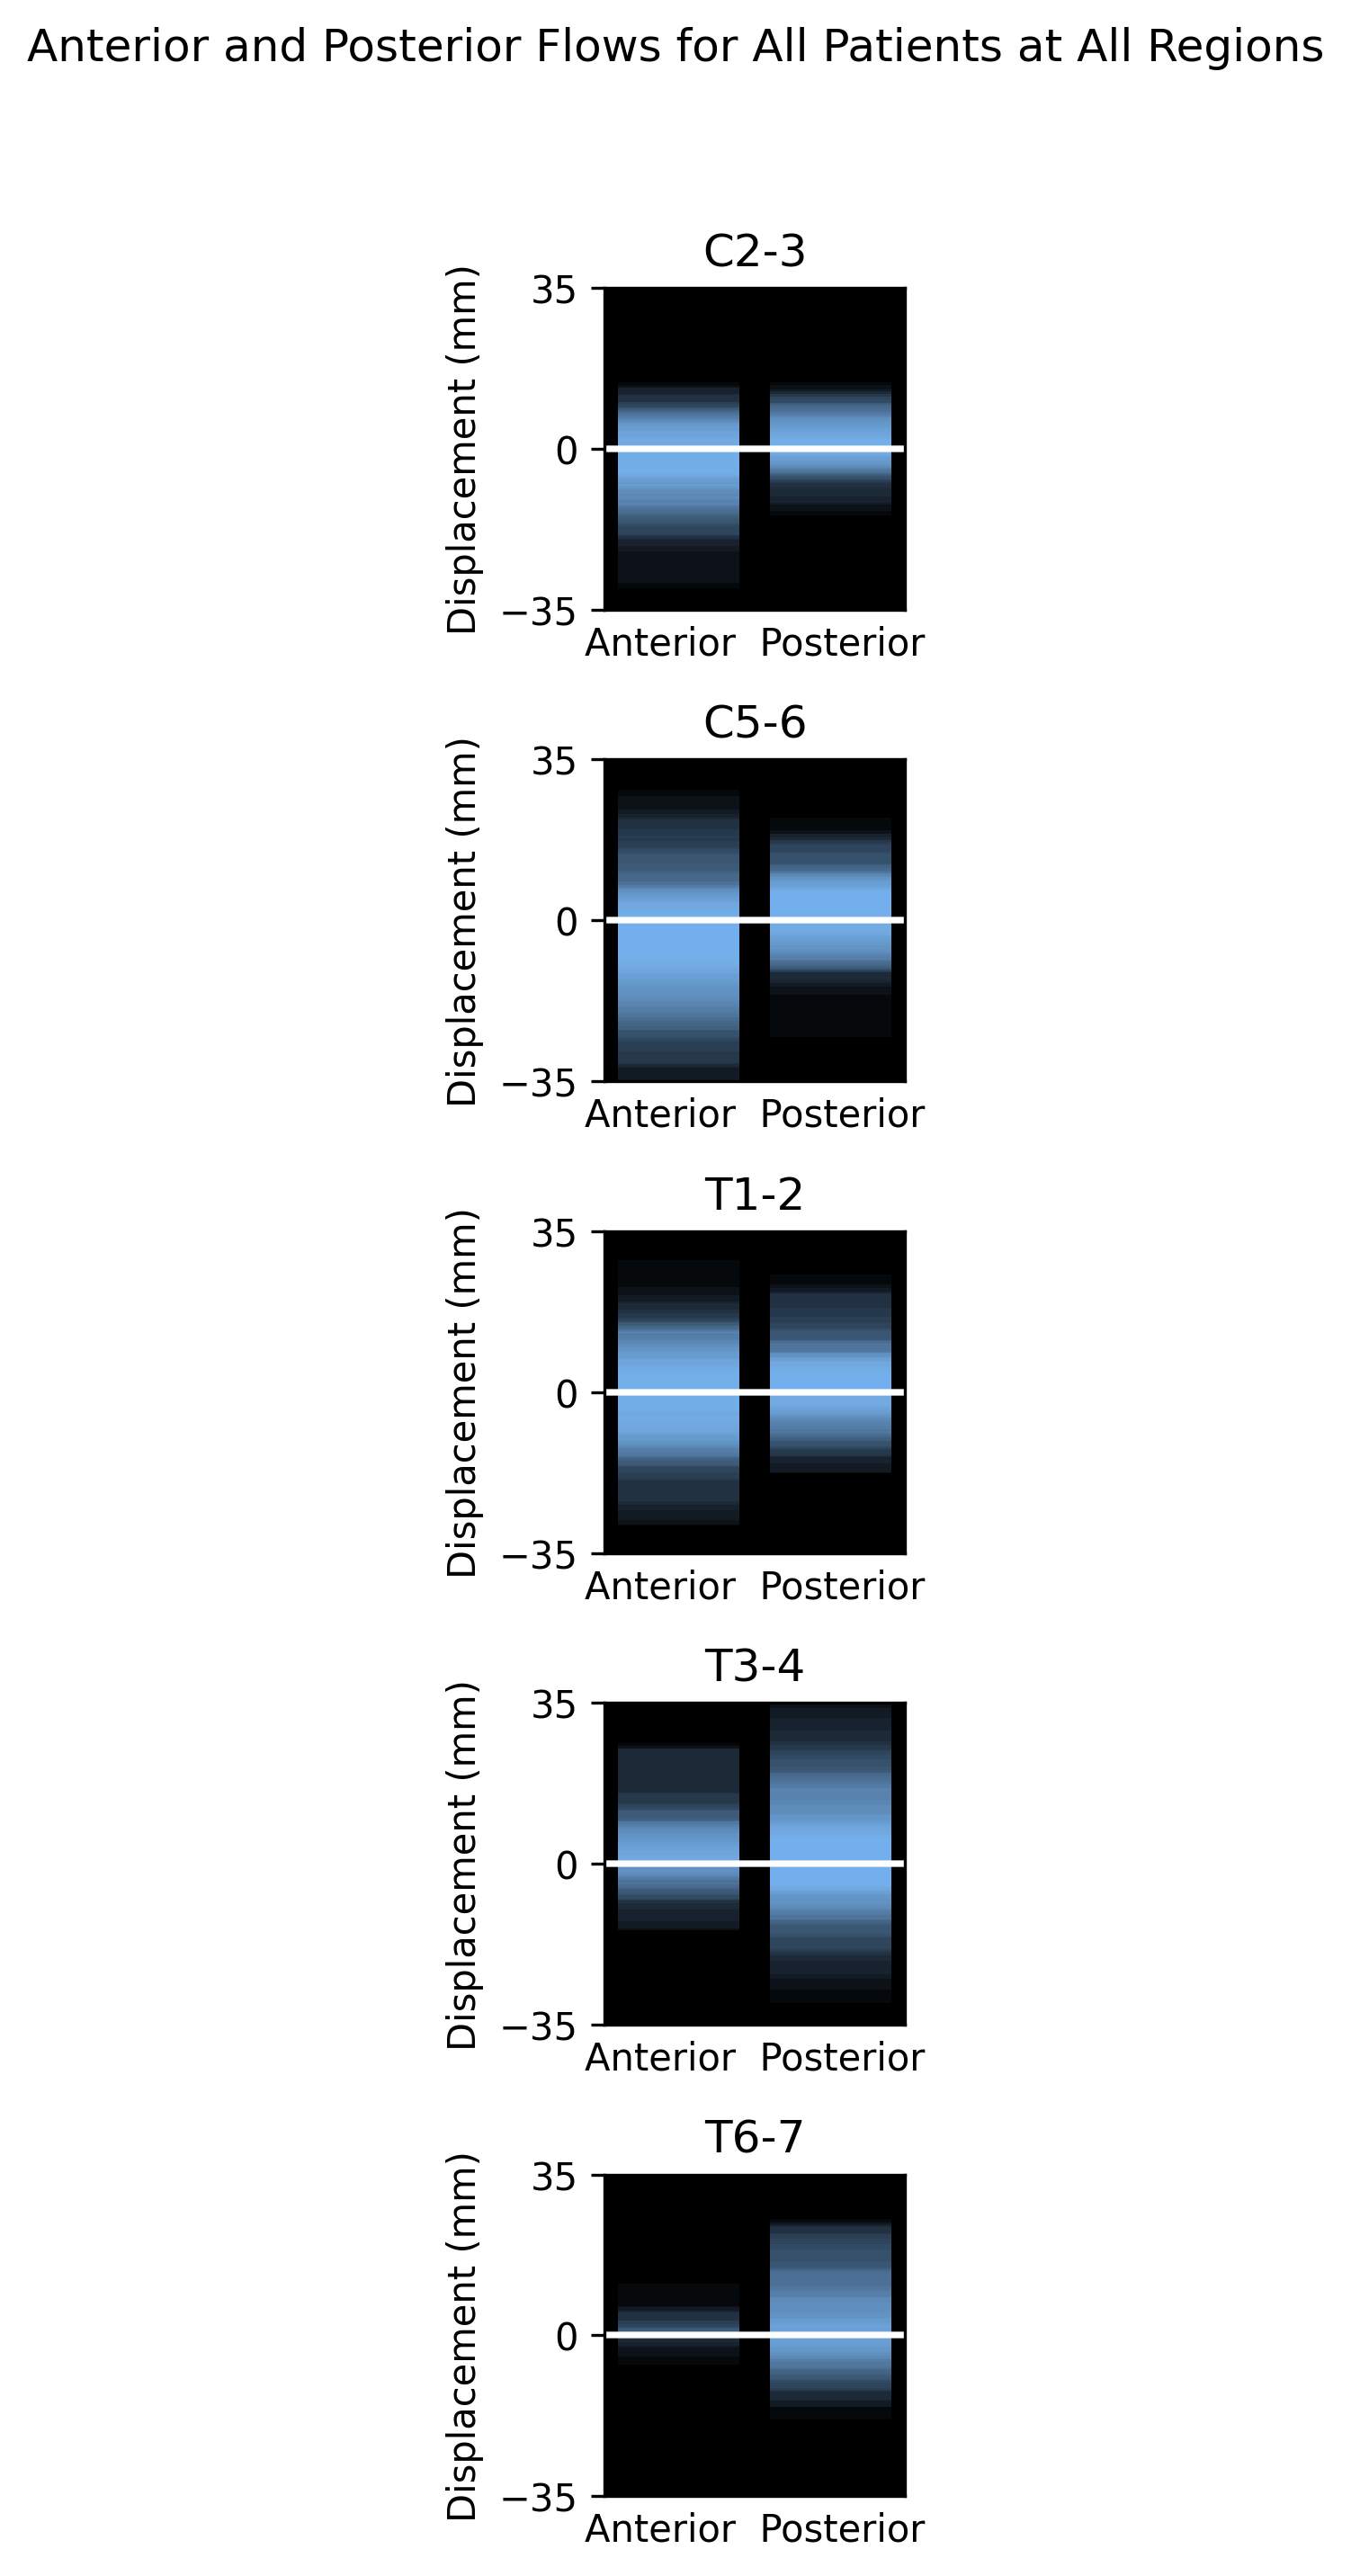

In [12]:
patient_ids = csf_flow_df['patient_id'].unique()
patient_count = csf_flow_df['patient_id'].nunique()
spinal_regions = ['C2-3', 'C5-6', 'T1-2', 'T3-4', 'T6-7']
region_count = len(spinal_regions)
images_per_patient_per_region = 8

fig, axes = plt.subplots(region_count, 1, figsize=(2, 10))

def get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_region):
    # Get data from the CSF flow data frame for one patient in one vertebral region (`C2-3`, etc.)
    data = csf_flow_df[(csf_flow_df['patient_id'] == patient_id) & (csf_flow_df['spinal_region'] == spinal_region)]
    return data

def calculate_bar_bottom_and_height(superior_boundary, inferior_boundary):
    # Use the measurements of the displacement of the superior and inferior boundaries to calc graph's bar's height
    results = {
        'top': None,
        'bottom': None
    }
    results['top'] = abs(superior_boundary - inferior_boundary)
    results['bottom'] = min([superior_boundary, inferior_boundary])
    return results

x_axis_labels = list(range(1, images_per_patient_per_region+1))
for i in range(len(axes)):
    for patient_id in patient_ids:
        #print(f'Getting CSF flow data for patient {patient_id} and vertebral region {i}')
        graph_data = get_csf_flow_data_by_patient_id_and_region(patient_id, spinal_regions[i])
        anterior_bar_dimensions = [calculate_bar_bottom_and_height(data[0], data[1])
                            for data in zip(graph_data['super_ante_displacement'], graph_data['infer_ante_displacement'])]
        anterior_tops = [item['top'] for item in anterior_bar_dimensions]
        anterior_bottoms = [item['bottom'] for item in anterior_bar_dimensions]

        posterior_bar_dimensions = [calculate_bar_bottom_and_height(data[0], data[1])
                            for data in zip(graph_data['super_post_displacement'], graph_data['infer_post_displacement'])]
        posterior_tops = [item['top'] for item in posterior_bar_dimensions]
        posterior_bottoms = [item['bottom'] for item in posterior_bar_dimensions]

        axes[i].set_facecolor('black')
        axes[i].set_xticks([])
        axes[i].set_yticks([-35, 0, 35])
        axes[i].set_xlabel('Anterior  Posterior')
        axes[i].set_ylabel('Displacement (mm)')
        axes[i].set_title(f'{spinal_regions[i]}')
        axes[i].axhline(y=0, color='w', alpha=0.5)
        axes[i].set_ylim(-35, 35)

        for j in range(images_per_patient_per_region):
            try:
                ante = axes[i].bar('Anterior', anterior_tops[j], bottom=anterior_bottoms[j], alpha=0.05, color='#85c2ff')
                post = axes[i].bar('Posterior', posterior_tops[j], bottom=posterior_bottoms[j], alpha=0.05, color='#85c2ff')
            except IndexError as e:
                pass
                #print(f'The value for the CSF flow at image `({i, patient_id, j})` was unreadable.')
            
fig.suptitle('Anterior and Posterior Flows for All Patients at All Regions')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])